# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from adjustText import adjust_text

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_name = city_weather['name']
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})    
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | byron bay
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | fairbanks
Processing Record 10 of Set 1 | new iberia
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | faya
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | buenos aires
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | n

Processing Record 39 of Set 4 | kavaratti
Processing Record 40 of Set 4 | plettenberg bay
Processing Record 41 of Set 4 | penzance
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | viligili
City not found. Skipping...
Processing Record 44 of Set 4 | salta
Processing Record 45 of Set 4 | kaitangata
Processing Record 46 of Set 4 | porto velho
Processing Record 47 of Set 4 | san buenaventura
Processing Record 48 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 4 | moron
Processing Record 0 of Set 5 | aleksandrov gay
Processing Record 1 of Set 5 | mattru
Processing Record 2 of Set 5 | bressanone
Processing Record 3 of Set 5 | airai
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | zolotukhino
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | lazaro cardenas
Processing Record 9 of Set 5 | tommot
Processing Record 10 of Set 5 | masindi
Processing Record 

Processing Record 29 of Set 8 | lazurne
Processing Record 30 of Set 8 | ruidoso
Processing Record 31 of Set 8 | thinadhoo
Processing Record 32 of Set 8 | kinablangan
Processing Record 33 of Set 8 | amahai
Processing Record 34 of Set 8 | pitimbu
Processing Record 35 of Set 8 | havoysund
Processing Record 36 of Set 8 | weligama
Processing Record 37 of Set 8 | hihifo
City not found. Skipping...
Processing Record 38 of Set 8 | frontera
Processing Record 39 of Set 8 | black river
Processing Record 40 of Set 8 | williams lake
Processing Record 41 of Set 8 | aasiaat
Processing Record 42 of Set 8 | dodge city
Processing Record 43 of Set 8 | bealanana
Processing Record 44 of Set 8 | zemio
Processing Record 45 of Set 8 | manzhouli
Processing Record 46 of Set 8 | altamira
Processing Record 47 of Set 8 | roald
Processing Record 48 of Set 8 | te anau
Processing Record 49 of Set 8 | severomuysk
Processing Record 0 of Set 9 | lolua
City not found. Skipping...
Processing Record 1 of Set 9 | fortuna
Pr

Processing Record 18 of Set 12 | hibbing
Processing Record 19 of Set 12 | parsabad
Processing Record 20 of Set 12 | atar
Processing Record 21 of Set 12 | tolaga bay
Processing Record 22 of Set 12 | bubaque
Processing Record 23 of Set 12 | geraldton
Processing Record 24 of Set 12 | corciano
Processing Record 25 of Set 12 | amuntai
Processing Record 26 of Set 12 | tselinnoye
Processing Record 27 of Set 12 | macaboboni
City not found. Skipping...
Processing Record 28 of Set 12 | poum
Processing Record 29 of Set 12 | alotau
City not found. Skipping...
Processing Record 30 of Set 12 | murdochville
Processing Record 31 of Set 12 | vestmannaeyjar
Processing Record 32 of Set 12 | madison
Processing Record 33 of Set 12 | stornoway
Processing Record 34 of Set 12 | rio grande
Processing Record 35 of Set 12 | maceio
Processing Record 36 of Set 12 | asyut
Processing Record 37 of Set 12 | limoges
Processing Record 38 of Set 12 | chernyshevskiy
Processing Record 39 of Set 12 | malyye derbety
Processi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,9.16,87,100,7.34,RU,1681425354
1,Ushuaia,-54.8000,-68.3000,42.46,75,0,2.30,AR,1681425354
2,Iqaluit,63.7506,-68.5145,19.13,85,100,2.30,CA,1681425354
3,Byron Bay,-28.6500,153.6167,68.70,65,33,12.57,AU,1681425111
4,Busselton,-33.6500,115.3333,52.77,69,69,15.82,AU,1681425354


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Chokurdakh,70.6333,147.9167,9.16,87,100,7.34,RU,1681425354
1,Ushuaia,-54.8000,-68.3000,42.46,75,0,2.30,AR,1681425354
2,Iqaluit,63.7506,-68.5145,19.13,85,100,2.30,CA,1681425354
3,Byron Bay,-28.6500,153.6167,68.70,65,33,12.57,AU,1681425111
4,Busselton,-33.6500,115.3333,52.77,69,69,15.82,AU,1681425354


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

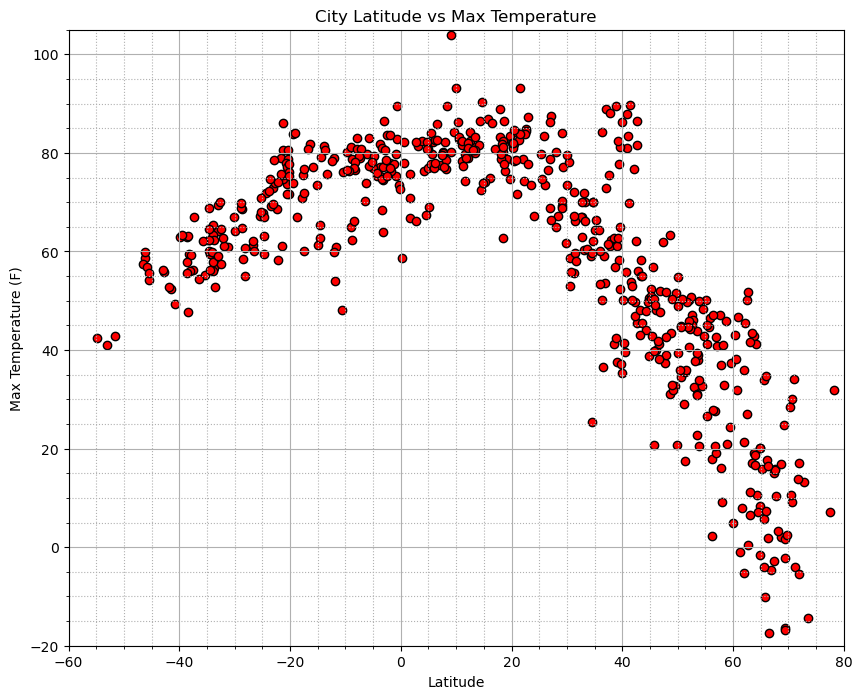

In [25]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color='r', edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.ylim(-20, 105)
plt.xlim(-60, 80)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

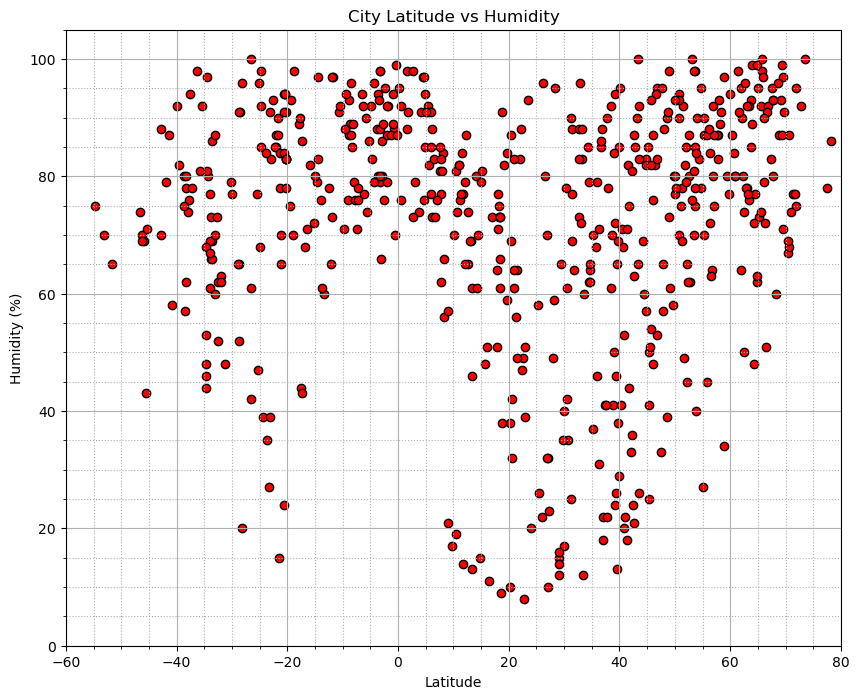

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color='r', edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.ylim(0, 105)
plt.xlim(-60, 80)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

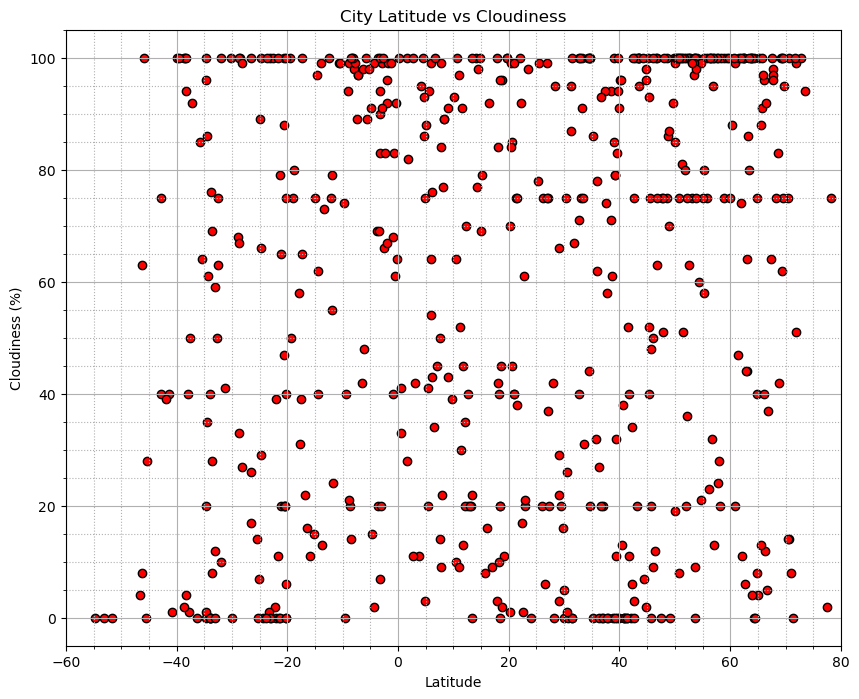

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color='r', edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.ylim(-5, 105)
plt.xlim(-60, 80)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

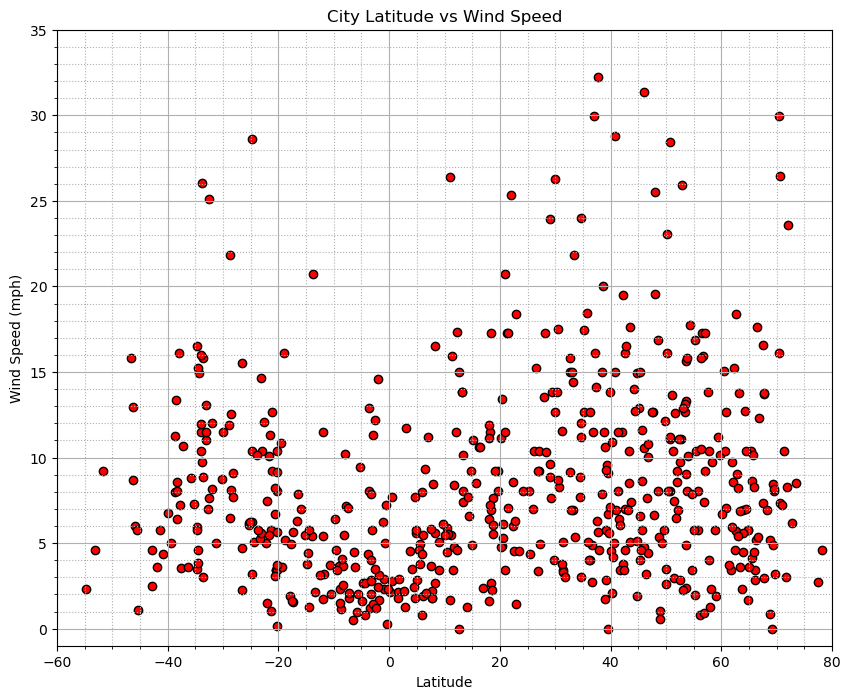

In [27]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, color='r', edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.ylim(-1, 35)
plt.xlim(-60, 80)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, color='r', edgecolors="black")
    plt.plot(x_values, regression_values,"r-")
    
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    x_min = x_values.min()
    y_min = y_values.min()
    plt.text(x_min, y_min+2, line_eq, fontsize=15, color="black")
    
    print(f"r-value: {rvalue**2}")
    print(line_eq)
    
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Chokurdakh,70.6333,147.9167,9.16,87,100,7.34,RU,1681425354
2,Iqaluit,63.7506,-68.5145,19.13,85,100,2.30,CA,1681425354
6,Fairbanks,64.8378,-147.7164,20.08,62,40,5.75,US,1681425185
7,New Iberia,30.0035,-91.8187,73.47,40,0,12.66,US,1681425220
8,Jamestown,42.0970,-79.2353,76.64,33,0,11.50,US,1681425112


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df  = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Ushuaia,-54.8000,-68.3000,42.46,75,0,2.30,AR,1681425354
3,Byron Bay,-28.6500,153.6167,68.70,65,33,12.57,AU,1681425111
4,Busselton,-33.6500,115.3333,52.77,69,69,15.82,AU,1681425354
5,Mataura,-46.1927,168.8643,58.77,70,8,8.68,NZ,1681425355
9,Isangel,-19.5500,169.2667,83.91,75,100,10.87,VU,1681425355


###  Temperature vs. Latitude Linear Regression Plot

r-value: 0.7395731872002754
y = -1.14x +97.67


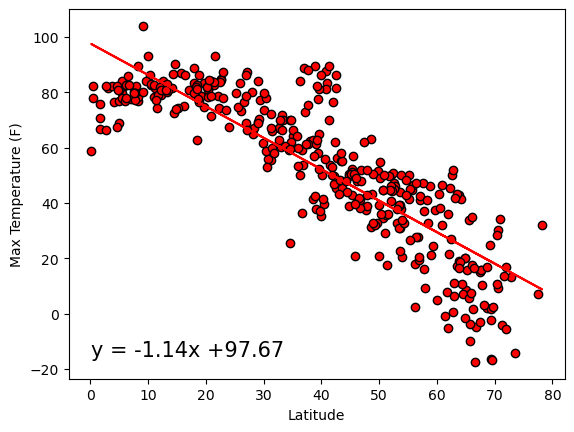

In [16]:
# Linear regression on Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
y_label = "Max Temperature (F)"

regression_plot(x, y, y_label)

r-value: 0.5792775543617811
y = 0.56x +80.94


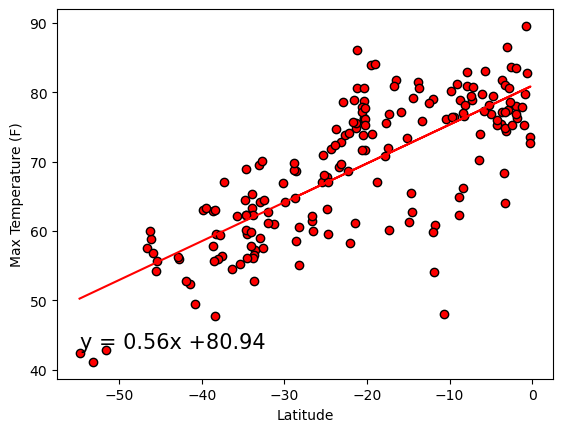

In [17]:
# Linear regression on Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
y_label = "Max Temperature (F)"

regression_plot(x, y, y_label)

**Discussion about the linear relationship:** The northern hemisphere has an inverse relationship between Latitude and Temperature while the southern hemisphere has a direct relationship.

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.04866893404005121
y = 0.26x +59.55


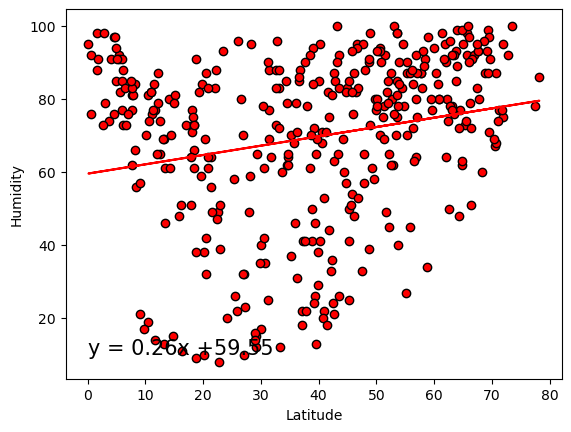

In [18]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
y_label = 'Humidity'

regression_plot(x, y, y_label)

r-value: 0.11192335049216422
y = 0.41x +85.79


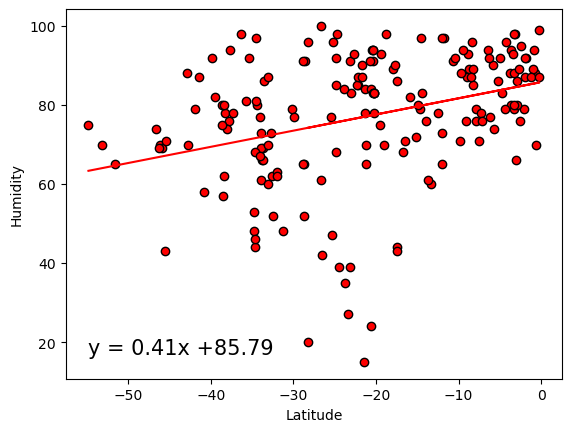

In [19]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
y_label = 'Humidity'

regression_plot(x, y, y_label)

**Discussion about the linear relationship:** The correlation between Latitude and Humidity is very weak in both hemispheres. However it does appear that as Latitude increase Humidity also increases.

### Cloudiness vs. Latitude Linear Regression Plot

r-value: 0.02207498019246602
y = 0.28x +49.38


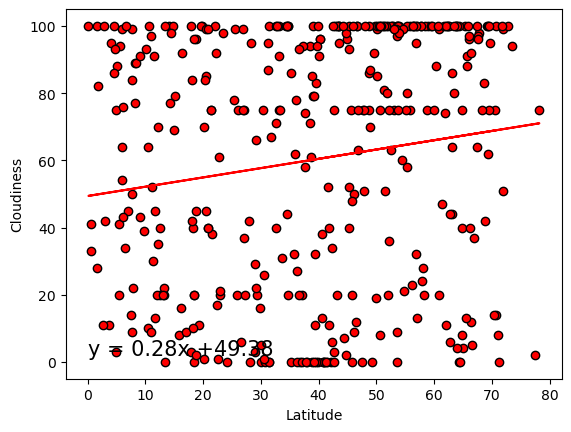

In [20]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
y_label = 'Cloudiness'

regression_plot(x, y, y_label)

r-value: 0.10082505182213894
y = 0.9x +73.61


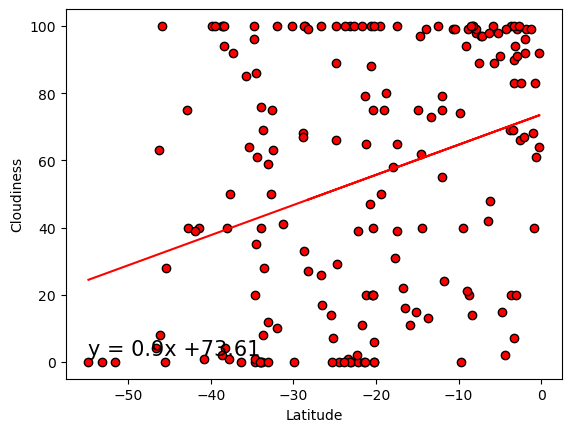

In [21]:
# Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
y_label = 'Cloudiness'

regression_plot(x, y, y_label)

**Discussion about the linear relationship:** The regression shows that there is no correlation between Cloudiness and Latitude in the Northern Hemisphere and a negligible correlation between Cloudiness and Latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.013664056690718017
y = 0.03x +7.55


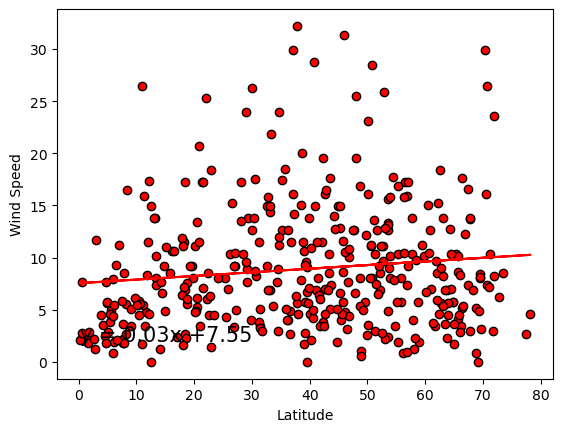

In [22]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
y_label = 'Wind Speed'

regression_plot(x, y, y_label)

r-value: 0.11746207917856805
y = -0.13x +4.21


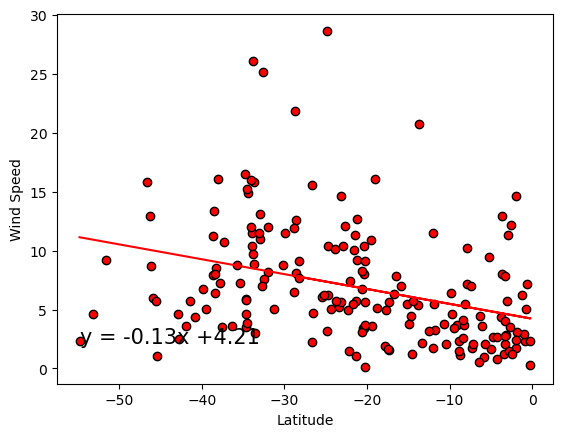

In [23]:
# Southern Hemisphere

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
y_label = 'Wind Speed'

regression_plot(x, y, y_label)

**Discussion about the linear relationship:** There is no correlation between Latitude and Wind Speed in either hemisphere.